# CS412 - Machine Learning - 2020
## Homework 1
100 pts


## Goal

The goal of this homework is three-fold:

*   Introduction to the machine learning experimental set up 
*   Gain experience with Decision tree approache
*   Gain experience with the Scikit library

## Dataset
**MNIST** is a collection of 28x28 grayscale images of digits (0-9); hence each pixel is a gray-level from 0-255. 

**Download the data from Keras. You must use a 20% of the training data for validation** (no need for cross-validation as you have plenty of data) and **use the official test data (10,000 samples) only for testing.**

## Task 
Build a decision tree classifier with the scikit library function calls to classify digits in the MNIST dataset.

## Software: You may find the necessary function references here:
http://scikit-learn.org/stable/supervised_learning.html

## Submission: 
Fill this notebook and submit this document with a link to #your Colab notebook 
(make sure to include the link obtained from the #share link on top right)


##1) Initialize

*   First make a copy of the notebook given to you as a starter.

*   Make sure you choose Connect form upper right.


## 2) Load training dataset

*  Read from Keras library.



In [ ]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
import tensorflow as tf


# Read data 
train, test= tf.keras.datasets.mnist.load_data(path="mnist.npz")

X_train, y_train = train
X_test, y_test = test






In [ ]:
X_train = X_train.reshape(X_train.shape[0],784)
df= pd.DataFrame(X_train)
df["labels"]= y_train
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,labels
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9


##3) Understanding the dataset

There are alot of functions that can be used to know more about this dataset

- What is the shape of the training set (num of samples X number of attributes) ***[shape function can be used]***

- Display attribute names ***[columns function can be used]***

- Display the first 5 rows from training dataset ***[head or sample functions can be used]***

Note: Understanding the features, possibly removing some features etc. is an important part in building an ML system, but for this homework this is not really necessary as  the features are homogeneous (pixels) and all necessary.


In [ ]:
# print shape

print('Data Dimensionality: ',df.shape)



# print first 5 rows in your dataset
print('Head of Data: ')
df.head()





Data Dimensionality:  (60000, 785)
Head of Data: 


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,labels
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9


##4) Shuffle and Split TRAINING data as train (also called development) (80%) and validation (20%) 

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Shuffle the training data
df2=shuffle(df)
df2.head()






# Split 80-20
X_train, X_valid, y_train, y_valid = train_test_split(df2.drop(columns=['labels']),df2.labels, test_size=0.2,random_state=42)






In [ ]:
X_valid.shape

(12000, 784)

##5) Train a decision tree classifier on development/train data and do model selection using the validation data

* Train 3 decision tree classifiers with different values of "min_samples_split" which is the minimum number of samples required to split an internal node:  min_samples_split = [default = 2, 5, 10]. 
* Test the 3 models on validation set and choose the best one.
* Plot the train and validation set errors for those 3 settings - on one plot. 


In [ ]:

# Train decision tree classifiers
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score


clf1 = DecisionTreeClassifier(min_samples_split=2)
clf1 = clf1.fit(X_train,y_train)
clf2 = DecisionTreeClassifier(min_samples_split=5)
clf2 = clf2.fit(X_train,y_train)
clf3 = DecisionTreeClassifier(min_samples_split=10)
clf3 = clf3.fit(X_train,y_train)




# Evaluate on validation set


y_1 = clf1.predict(X_valid)
y_2 = clf2.predict(X_valid)
y_3 = clf3.predict(X_valid)

x_1= clf1.predict(X_train)
x_2 = clf2.predict(X_train)
x_3 = clf3.predict(X_train)




# Plot errors
print("Accuracy score for min_samples_split=2 is",accuracy_score(y_valid, y_1))
print("Accuracy score for min_samples_split=5 is",accuracy_score(y_valid, y_2))
print("Accuracy score for min_samples_split=10 is",accuracy_score(y_valid, y_3))


Accuracy score for min_samples_split=2 is 0.87225
Accuracy score for min_samples_split=5 is 0.87075
Accuracy score for min_samples_split=10 is 0.8704166666666666


In [ ]:
s = [accuracy_score(y_valid, y_1), accuracy_score(y_valid, y_2), accuracy_score(y_valid, y_3)]

In [ ]:
t = [accuracy_score(y_train, x_1), accuracy_score(y_train, x_2), accuracy_score(y_train, x_3)]
for i in t:
  print(i)

1.0
0.9832916666666667
0.9669583333333334


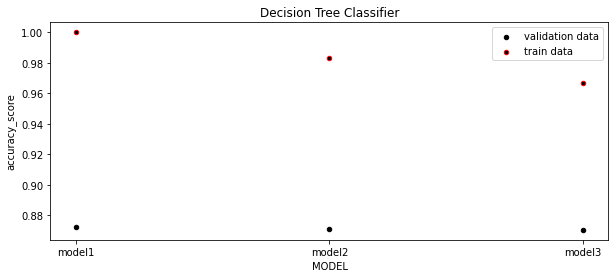

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.scatter(["model1", "model2", "model3"], s, s=20, edgecolor="black",
            c="black", label="validation data")
plt.scatter(["model1", "model2", "model3"], t, s=20, edgecolor="red",
            c="black", label="train data")

plt.xlabel("MODEL")
plt.ylabel("accuracy_score")
plt.title("Decision Tree Classifier")
plt.legend()
plt.show()

## 7) Test your CHOSEN classifier on Test set

- Load test data
- Apply same pre-processing as training data (probably none)
- Predict the labels of testing data **using the best chosen SINGLE model out of the models that you have tried from step 6 (you have selected your model according to your validation results)** and report the accuracy. 

In [ ]:
from sklearn.metrics import accuracy_score

# Load test data

X_test = X_test.reshape(X_test.shape[0],784)
df= pd.DataFrame(X_test)
df["labels"]= y_test
df.head()



# test prediction using a decision tree with all default parameters and ..... min-split value 
clf1 = DecisionTreeClassifier(min_samples_split=2)
clf1 = clf1.fit(X_train,y_train)

y_1 = clf1.predict(X_test)



# Report your accuracy
acc = accuracy_score(y_1,y_test)
print(acc)



0.8727


##8) Notebook & Report 

**Notebook: We may just look at your notebook results; so make sure each cell is run and  outputs are there.**

**Report: Write an at most 1/2 page summary of your approach to this problem at the end of your notebook**; this should be like an abstract of a paper or the executive summary (you aim for clarity and passing on information, not going to details about known facts such as what dec. trees are or what MNIST is, assuming they are known to people in your research area). 

**Must include statements such as:**

 ( Include the problem definition: 1-2 lines )
 
  (Talk about train/val/test sets, size and how split. )
 
  (Talk about any preprocessing you do.)
  
 ( Give the validation accuracies for different approaches, parameters **in a table** and state which one you selected)
 
 ( State  what your test results are with the chosen method, parameters: e.g. "We have obtained the best results with the ….. classifier      (parameters=....) , giving classification accuracy of …% on test data….""

  (Comment on the speed of the algorithms and anything else that you deem important/interesting (e.g. confusion matrix)).

*You will get full points from here as long as you have a good (enough) summary of your work, regardless of your best performance or what you have decided to talk about in the last few lines.*


We are trying to find the best model for recognize and predict the number on the picture by looking their accuracy score. Our test data size is 10000 and we split our train datas %20 into validation and %80 train. The size of the given data is 60000 and we transform the data into 2 dimension for fitting it into a model it is the preprocessing step which I do. The shape of the data is (60000, 785). 


| Tables    |  min_samples_split|Train Accuracy score|validation Accuracy score|
|-----------    |:-----------------:|:-----------------:|:--------------------:|
| DecisionTree1 |           2       |        1.0      |             0.872|
| DecisionTree2 |           5       |        0.98      |             0.8707  |
| DecisionTree3|           10       |        0.96      |             0.8704  |


First I modeled 3 different decision tree models with diffrent min_samples_split parameters(2,5,10) and fit the train datas in them after that I predidict the validation data with them after that I looked the accuracy rate of prediction result with real validation data by lokking the accuracy rates of 3 diffrent models I selected decision tree1 which has min_samples_split=2 because it has the biggest validation accuracy score and its accuracy_score is 0.872

In conclusion I obtain the best result with decisiontree classifier with parameter min_samples_split=2 and its classification accuracy is %87 on test data of MNIST

##9) Submission

Please submit your **"share link" INLINE in Sucourse submissions**. That is we should be able to click on the link and go there and run (and possibly also modify) your code. 

For us to be able to modify, in case of errors etc, **you should get your "share link" as **share with anyone in edit mode** 

 **Also submit your notebook as pdf as attachment**, choose print and save as PDF, save with hw1-lastname-firstname.pdf to facilitate grading. 


## Questions? 

You can and should ask all your Google Colab related questions under Forums  and feel free to answer/share your answer regarding Colab. 

You can also ask/answer about which functions to use and what libraries... 

However you should **not ask** about the core parts, that is what is validation/test, which one shd. have higher performance, what are your scores etc.
